In [1]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.neighbors import NearestNeighbors


warnings.filterwarnings('ignore')
from sklearn.exceptions import ConvergenceWarning

In [2]:
from google.colab import files
 
 
uploaded = files.upload()

Saving base_final.csv to base_final (1).csv


In [3]:
data = 'base_final.csv'

df = pd.read_csv(data, sep = ";")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22442 entries, 0 to 22441
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   NUMERODO    22442 non-null  int64
 1   IND_RC      22442 non-null  int64
 2   QTDGESTANT  22442 non-null  int64
 3   QTDFILVIVO  22442 non-null  int64
 4   GESTACAO    22442 non-null  int64
 5   PESO        22442 non-null  int64
 6   QTDPARTNOR  22442 non-null  int64
 7   TPROBSON    22442 non-null  int64
 8   PARIDADE    22442 non-null  int64
 9   CONSULTAS   22442 non-null  int64
 10  KOTELCHUCK  22442 non-null  int64
 11  IDADEMAE    22442 non-null  int64
 12  QTDFILMORT  22442 non-null  int64
 13  IDADE       22442 non-null  int64
 14  CONSPRENAT  22442 non-null  int64
 15  QTDPARTCES  22442 non-null  int64
dtypes: int64(16)
memory usage: 2.7 MB


In [5]:
df.drop(['NUMERODO', 'IND_RC'], axis=1, inplace=True)

In [6]:
ms = MinMaxScaler()
cols = df.columns

X = ms.fit_transform(df)
X = pd.DataFrame(X, columns = [cols])

Text(0.5, 1.0, 'Dendrogram Mortalidade Infantil')

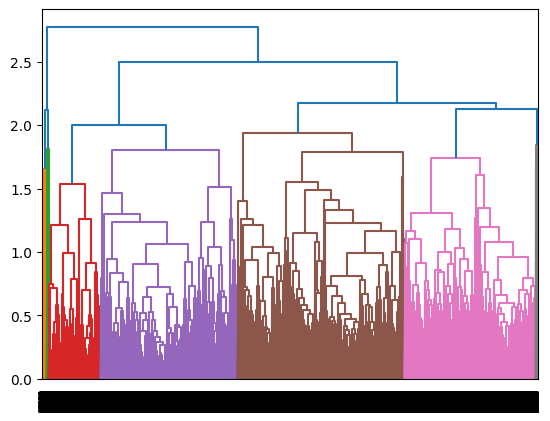

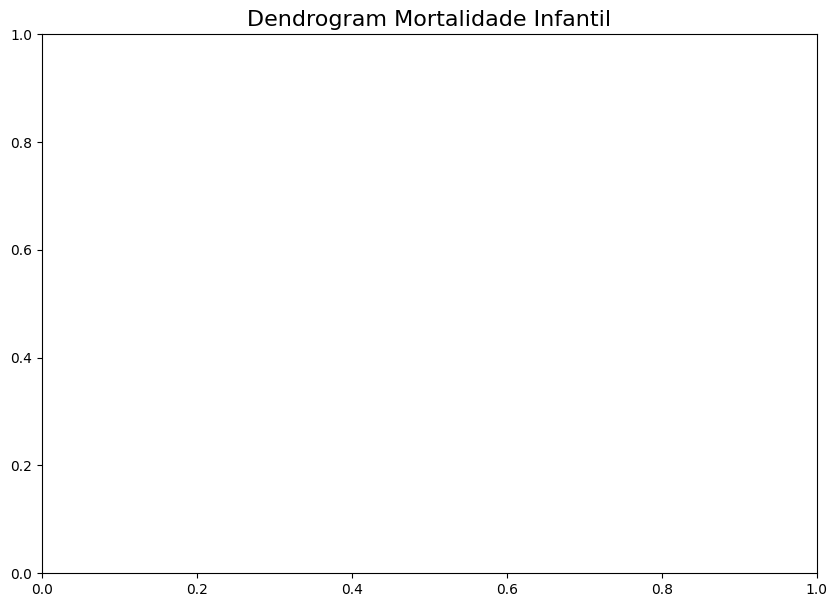

In [7]:
linkage_data = linkage(X, 'complete')
dendrogram(linkage_data)
plt.figure(figsize=(10, 7))  

In [8]:
def sil_scores(X, Z, ts):
    '''
    Cria uma lista do silhouette scores por numero de grupos.
    '''
    scores = []
    
    for num_clust in ts:
        scores.append(silhouette_score(X, fcluster(Z, t=num_clust, criterion='maxclust')))
    
    return scores

scores = sil_scores(X, linkage_data, range(2,8))


In [9]:
for t, s in zip(range(2,8), scores):
    print(f"Com {t} clusters, o valor do silhouette score é {s}")

Com 2 clusters, o valor do silhouette score é 0.36717752100129314
Com 3 clusters, o valor do silhouette score é 0.3667241798594447
Com 4 clusters, o valor do silhouette score é 0.32985260245948544
Com 5 clusters, o valor do silhouette score é 0.32028822938571627
Com 6 clusters, o valor do silhouette score é 0.3212015157802431
Com 7 clusters, o valor do silhouette score é 0.3625374984094586
